Major Imports

In [6]:
import torch
import numpy as np 
import pandas as pd 
import os
from os import listdir
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
#import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
# %matplotlib inline
#import imutils    

from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle #shuffling the data improves the model
import warnings

SEED = 123
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
#torch.cuda.manual_seed_all(SEED)
warnings.filterwarnings("ignore", "Lazy modules are a new feature.*")

import numpy as np
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F 
from torch import nn,optim
from torchvision import transforms as T,datasets,models
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from collections import OrderedDict
from tqdm import tqdm
pd.options.plotting.backend = "plotly"
from torch import nn, optim
from torch.autograd import Variable
from cleanlab.classification import CleanLearning
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image
#from torchvision import imshow
import numpy as np
import cleanlab
from cleanlab.classification import CleanLearning
from cleanlab.benchmarking import noise_generation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from numpy.random import multivariate_normal
from matplotlib import pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
#import cv2
import copy
import os
from sklearn.model_selection import train_test_split
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import torchvision.transforms as transform
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from PIL import Image

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from torch.utils.data.sampler import SubsetRandomSampler  # For validation set

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Data directory for mislabeled data. Contains training, validation, and test data.

data_dir = "/home/tejoman/Documents/Cleanlab Pytorch Pneumonia/archive_test/chest_xray/"
data_dir = "/home/tejoman/Documents/Cleanlab Pytorch Pneumonia/archive_test_100 to 1/chest_xray/"
data_dir = "/home/tejoman/Documents/Cleanlab Pytorch Pneumonia/archive_test_50 to 1/chest_xray/"
data_dir = "/home/tejoman/Documents/Cleanlab Pytorch Pneumonia/archive_test_10 to 1/chest_xray/"
data_dir = "/home/tejoman/Documents/Cleanlab Pytorch Pneumonia/archive_test_5 to 1/chest_xray/"
data_dir = "/home/tejoman/Documents/Cleanlab Pytorch Pneumonia/archive_test_2 to 1/chest_xray/"
data_dir = "C:\\Users\\Small\\OneDrive\\Documents\\chest_xray\\"
data_dir = "C:\\Users\\Small\\OneDrive\\Documents\\Cleanlab Testing\\test_10_to_1\\chest_xray\\"

Model-Related Functions

In [27]:
def data_transforms(phase = None):
    
    if phase == TRAIN:
        
        data_T = T.Compose([
                
                T.Resize(size = (224,224)),
                #T.RandomRotation(degrees = (-20,+20)),
                #T.CenterCrop(size=224),
                T.ToTensor(),
                T.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ])
    
    elif phase == TEST or phase == VAL:
        
        data_T = T.Compose([
                
                T.Resize(size = (224,224)),
                T.ToTensor(),
                T.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
        ])
    
    return data_T


#Visualize some images
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:60], nrow=10).permute(1, 2, 0))
        break


def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) 
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)), preds


def train(model, criterion, optimizer, scheduler, epochs):
  since = time.time()
  best_model = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  for epoch in range(epochs):
    for phase in ['train', 'val']:
      if phase == 'train':
        model.train()
      else:
        model.eval()
      
      running_loss = 0.0
      running_corrects = 0.0
      
      for inputs, labels in loaders[phase]:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        with torch.set_grad_enabled(phase=='train'):
          outp = model(inputs)
          _, pred = torch.max(outp, 1)
          loss = criterion(outp, labels)
          
          if phase == 'train':
            loss.backward()
            optimizer.step()
        
        running_loss += loss.item()*inputs.size(0)
        running_corrects += torch.sum(pred == labels.data)
      
      
      epoch_loss = running_loss / dataset_sizes[phase]
      epoch_acc = running_corrects.double()/dataset_sizes[phase]
      losses[phase].append(epoch_loss)
      accuracies[phase].append(epoch_acc)
      if phase == 'train':
        print('Epoch: {}/{}'.format(epoch+1, epochs))
      print('{} - loss:{}, accuracy{}'.format(phase, epoch_loss, epoch_acc))
      
      if phase == 'val':
        print('Time: {}m {}s'.format((time.time()- since)//60, (time.time()- since)%60))
      
      if phase == 'val' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model = copy.deepcopy(model.state_dict())
    scheduler.step()  
  time_elapsed = time.time() - since
  print('Training Time {}m {}s'.format(time_elapsed//60, time_elapsed%60)) 
  print('Best accuracy {}'.format(best_acc))
  
  model.load_state_dict(best_model)
  return model   


  #Running on test data
def validation_step(batch):
        images,labels = batch
        images,labels = images.to(device),labels.to(device)
        out = model(images)                                      
        loss = F.cross_entropy(out, labels)                    
        acc,preds = accuracy(out, labels)                       
        
        return {'val_loss': loss.detach(), 'val_acc':acc.detach(), 
                'preds':preds.detach(), 'labels':labels.detach()}




def test_prediction(outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()           
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()             
        # combine predictions
        batch_preds = [pred for x in outputs for pred in x['preds'].tolist()] 
        # combine labels
        batch_labels = [lab for x in outputs for lab in x['labels'].tolist()]  
        
        return {'test_loss': epoch_loss.item(), 'test_acc': epoch_acc.item(),
                'test_preds': batch_preds, 'test_labels': batch_labels}  


@torch.no_grad()
def test_predict(model, test_loader):
    model.eval()
    # perform testing for each batch
    outputs = [validation_step(batch) for batch in test_loader] 
    results = test_prediction(outputs)                          
    print('test_loss: {:.4f}, test_acc: {:.4f}'
          .format(results['test_loss'], results['test_acc']))
    
    return results['test_preds'], results['test_labels']

Labeling Error Related Functions

Attempt at Generalizability

In [8]:
from sklearn.covariance import MinCovDet

def sum_until(in_list, threshold):
    """
    Helper function for find_label_issues
    """
    count = 0
    for n in range(len(in_list)):
        if count < threshold:
            count += in_list[n]
        else:
            break
    return count, n+1

def gaussian_likelihood(cov_matrix, mahalanobis_square_dist):
    """
    Helper function for find_label_issues
    """
    n = cov_matrix.shape[0]
    sqrt_det = np.sqrt(np.linalg.det(cov_matrix))
    prob_x_f = ( 1 / ( (2*np.pi)**(n/2) * sqrt_det ) ) * np.exp(-mahalanobis_square_dist)
    return prob_x_f

def find_label_issues(model, data, pca_method="variance", pca_components=None, pca_variance=0.25, wc_threshold=0.05, ooc_threshold=0.95, prob_method="gaussian", data_transforms=None):
    """
    Creates a new model that aggregates input classification model features / feature maps at last layer before classification into a [p x 1] vector. 
    Then performs PCA to generate an [n x 1] vector of PCs, where n is specified either explicitly or by a desired level of explained variance. Then
    the probability that a given sample belongs to the assigned class is assessed using Bayes' rule, and if the probability falls below the within 
    class threshold, then the sample is compared to the other class(es), and if the probability that it belongs in another class is higher than the 
    out of class threshold, then the sample is added to an output DataFrame containing suspect samples and their associated probabilities. This
    function is dependent on the ability of the input classification model to extract salient features from the input data and thus should only be
    applied if the model is achieving some threshold auc / accuracy. 

    ### Parameters
    1. model : Pytorch model (torch.nn.Sequential)
        -A classification model
    2. data : Pytorch Dataset (torch.utils.data.Dataset, eventually...right now needs an ImageFolder)
        -The dataset used to train model
    3. pca_method : str
        -Use this string to specify whether to
         use the first n principal components 
         or to use as many components as needed
         to achieve a target explained variance
         ("variance" for variance method (default)
         or "components" for components method)
    4. pca_components : int
        -Number of components if using component
         method (None by default)
    5. pca_variance : float
        -Ratio of explained variance desired, if
         using explained variance method (0.25 by
         default)
    6. wc_threshold : float
        -Within class threshold to consider sample
         within distribution of other class(es) (0.05
         by default)
    7. ooc_threshold : float
        -Out of class threshold to see whether flagged
         samples belong to other class(es) (0.95 by
         default)
    8. prob_method : str
        -Method to use for calculating the likelihood,
         either specify a distribution type or use a 
         non-parametric estimator ("gaussian" is 
         default)
    9. data_transforms : func
        -Any data transformations performed prior to use 
         by the model
    
    ### Returns
    1. label_issues_df : Pandas DataFrame (pd.DataFrame)
        -A DataFrame containing the samples that are
         suspected label errors and their associated
         probabilities of belonging to each class, 
         as calculated by the above methods
    
    Raises
    ______
    We'll get to that

    """
    # Define Adaptive Labeling Error Detection (ALED) feature extraction model
    ALED_model = nn.Sequential(*list(model.children())[:-1])
    ALED_model.avgpool = torch.nn.AdaptiveAvgPool2d((1,1)) # Feature pooling of feature maps, probably will need to add another method for 1d and 3d features

    # Create sorted representation of data (right now only works on images in chest x-ray dataset):
    img_list = []
    data_df = pd.DataFrame(data.imgs, columns=["img", "label"])
    img_paths = data_df["img"].values

    for path in img_paths:
        img_temp = torchvision.io.read_image(path, torchvision.io.ImageReadMode.RGB)
        img_temp = torchvision.transforms.functional.to_pil_image(img_temp)
        img_temp = data_transforms(img_temp) # Note to self: for this dataset, the input for data_transforms should be data_transforms(TRAIN)
        img_list.append(img_temp)

    # Feature extraction (right now assumes model is on CUDA):
    feat_list = []
    for img in img_list:
        img_cuda = img.unsqueeze(0).cuda()
        img_feat = ALED_model(img_cuda)
        img_feat_cpu = img_feat.cpu()
        feat_list.append(img_feat_cpu.numpy())
        del img_cuda
        del img_feat
    
    # Time to do PCA in sklearn:
    feat_array = np.array(feat_list)
    feat_array = np.squeeze(feat_array, (1,3,4))

    from sklearn.decomposition import PCA

    # Todo: Make this more efficient somehow
    if pca_method == "variance":
        pca = PCA()
        pca.fit(feat_array)
        exp_variance = pca.explained_variance_ratio_
        calc_var, num_comps = sum_until(exp_variance, pca_variance)
        pca = PCA(num_comps)
        pca.fit(feat_array)
        X_new = pca.fit_transform(feat_array)
    elif pca_method == "components":
        pca = PCA(pca_components)
        pca.fit(feat_array)
        X_new = pca.fit_transform(feat_array)
    else:
        raise(ValueError("Need to correctly specify PCA method."))

    # Calculate covariance matrices for all class distributions
    classes = data.classes
    num_classes = len(classes)
    class_indices_dict = {}
    prior_probs_dict = {}
    PC_dict = {}
    cov_dict = {}

    for n in range(num_classes):
        class_indices = np.array(data_df[data_df["label"] == n].index)
        class_indices_dict["class{}_indices".format(n)] = class_indices
        class_PC_array = X_new[class_indices, :]
        PC_dict["class{}_PC_array".format(n)] = class_PC_array
        robust_cov = MinCovDet().fit(class_PC_array)
        cov_dict["robust_cov{}".format(n)] = robust_cov
    
    # Calculate prior probabilities
    for n in range(num_classes):
        prior_prob = len(class_indices_dict["class{}_indices".format(n)]) / ( sum( [len(class_indices_dict["class{}_indices".format(k)]) for k in range(num_classes)] ) )
        prior_probs_dict["prior_prob{}".format(n)] = prior_prob

    # Calculate likelihoods
    likelihoods_df_dict = {}
    for n in range(num_classes):
        likelihoods_dict = {}
        for k in range(num_classes):
            cov_matrix = cov_dict["robust_cov{}".format(k)].raw_covariance_
            cov_mahalanobis = cov_dict["robust_cov{}".format(k)].mahalanobis(PC_dict["class{}_PC_array".format(n)])
            probs_list = []
            for sample in cov_mahalanobis:
                prob_gauss = gaussian_likelihood(cov_matrix, sample)
                probs_list.append(prob_gauss)
            likelihoods_dict["p(x | k = {})".format(classes[k])] = probs_list
        likelihoods_df = pd.DataFrame.from_dict(likelihoods_dict).set_index(class_indices_dict["class{}_indices".format(n)])
        likelihoods_df_dict["likelihood_df{}".format(n)] = likelihoods_df
    
    # Calculate probabilities
    final_dfs_list = []
    for n in range(num_classes):
        likelihoods_df = likelihoods_df_dict["likelihood_df{}".format(n)]
        for k in range(num_classes):
            likelihoods_df["p(k = {} | x)".format(classes[k])] = likelihoods_df["p(x | k = {})".format(classes[k])] * prior_probs_dict["prior_prob{}".format(k)] / \
                sum( [likelihoods_df["p(x | k = {})".format(classes[m])] * prior_probs_dict["prior_prob{}".format(m)] for m in range(num_classes)] )
        likelihoods_df["given label (num)"] = n
        likelihoods_df["given label (name)"] = classes[n]
        final_dfs_list.append(likelihoods_df)

    out_df = pd.concat(final_dfs_list).sort_index()

    return out_df

Dataset Setup

In [9]:
TEST = 'test'
TRAIN = 'train'
VAL ='val'

trainset = datasets.ImageFolder(os.path.join(data_dir, TRAIN),transform = data_transforms(TRAIN))
testset = datasets.ImageFolder(os.path.join(data_dir, TEST),transform = data_transforms(TEST))
validset = datasets.ImageFolder(os.path.join(data_dir, VAL),transform = data_transforms(VAL))

class_names = trainset.classes
print(class_names)
print(trainset.class_to_idx)

BATCH_SIZE = 4

trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle = True)
validloader = DataLoader(validset, batch_size=BATCH_SIZE, shuffle = False)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle = False)
loaders = {'train':trainloader, 'val':validloader}
dataset_sizes = {'train':len(trainset), 'val':len(validset)}



images, labels = iter(trainloader).next()
print(images.shape)
print(labels.shape)

['NORMAL', 'PNEUMONIA']
{'NORMAL': 0, 'PNEUMONIA': 1}
torch.Size([4, 3, 224, 224])
torch.Size([4])


Initial Model Build

In [11]:
#Build Model
model = torchvision.models.densenet161(pretrained=True)


for param in model.parameters():
    param.requires_grad = False

in_features = model.classifier.in_features
print(in_features)
model.classifier = nn.Linear(in_features, 2)


#save the losses for further visualization
losses = {'train':[], 'val':[]}
accuracies = {'train':[], 'val':[]}

#Hyperparameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr = 0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 4, gamma=0.1)
epochs = 30
epochs = 2

#Run Model
model.to(device)
model = train(model, criterion, optimizer, scheduler, epochs)

2208
Epoch: 1/2
train - loss:0.3887946311530137, accuracy0.8305214723926381
val - loss:1.3232983518391848, accuracy0.5
Time: 2.0m 40.95410370826721s
Epoch: 2/2
train - loss:0.3671065702344479, accuracy0.8544861963190185
val - loss:1.1370290168561041, accuracy0.5
Time: 5.0m 15.985270023345947s
Training Time 5.0m 15.985270023345947s
Best accuracy 0.5


Run On Test Data

In [ ]:
#Running on test data
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle = False)
model.to(device)
preds,labels = test_predict(model, testloader)




# Plot confusion matrix
cm  = confusion_matrix(labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.xlabel('Predicted Label',fontsize=18)
plt.ylabel('True Label',fontsize=18)
plt.show()



# Compute Performance Metrics
tn, fp, fn, tp = cm.ravel()

accuracy = (np.array(preds) == np.array(labels)).sum() / len(preds)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*((precision*recall)/(precision+recall))

print("Accuracy of the model is {:.2f}".format(accuracy))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1 Score of the model is {:.2f}".format(f1))

In [13]:
prob_df = find_label_issues(model=model, data=trainset, data_transforms=data_transforms(TRAIN))

In [14]:
data_df = pd.DataFrame(trainset.imgs, columns=["img", "label"])
data_df["true_labels"] = data_df["img"].apply(lambda x : 1 if "person" in x else 0)

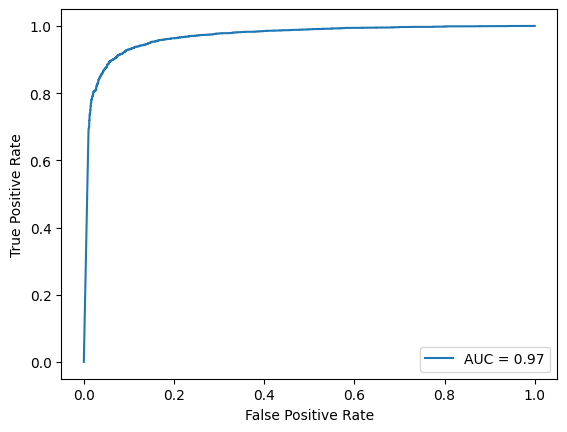

In [15]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(data_df["true_labels"].to_numpy(), prob_df["p(k = PNEUMONIA | x)"].to_numpy())
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=roc_auc)
display.plot()

In [16]:
img_paths = np.array(trainset.imgs)[:, 0]
suspected_class0_mislabels = img_paths[np.array(prob_df[(prob_df["p(k = PNEUMONIA | x)"] > 0.95) & (prob_df["given label (num)"] == 0)].index)]
suspected_class1_mislabels = img_paths[np.array(prob_df[(prob_df["p(k = PNEUMONIA | x)"] < 0.05) & (prob_df["given label (num)"] == 1)].index)]

In [17]:
moving_path = "C:\\Users\\Small\\OneDrive\\Documents\\Cleanlab Testing\\test_10_to_1\\suspected_mislabels"

for path in suspected_class0_mislabels:
    moving_path_new = moving_path + "\\class0"
    filename = path.split("\\")[-1]
    new_fname = moving_path_new + "\\" + filename
    os.rename(path, new_fname)

for path in suspected_class1_mislabels:
    moving_path_new = moving_path + "\\class1"
    filename = path.split("\\")[-1]
    new_fname = moving_path_new + "\\" + filename
    os.rename(path, new_fname)

Redefine Dataset and Try Again!

In [22]:
trainset = datasets.ImageFolder(os.path.join(data_dir, TRAIN),transform = data_transforms(TRAIN))
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle = True)
loaders = {'train':trainloader, 'val':validloader}
dataset_sizes = {'train':len(trainset), 'val':len(validset)}

model = train(model, criterion, optimizer, scheduler, epochs)

Epoch: 1/2
train - loss:0.16723413031764195, accuracy0.9415791875855773
val - loss:0.552920245565474, accuracy0.6875
Time: 1.0m 58.72190618515015s
Epoch: 2/2
train - loss:0.14858160792268785, accuracy0.942035600182565
val - loss:0.5343702156096697, accuracy0.75
Time: 3.0m 54.051937103271484s
Training Time 3.0m 54.16115880012512s
Best accuracy 0.75


test_loss: 0.2986, test_acc: 0.8958


<Figure size 640x480 with 0 Axes>

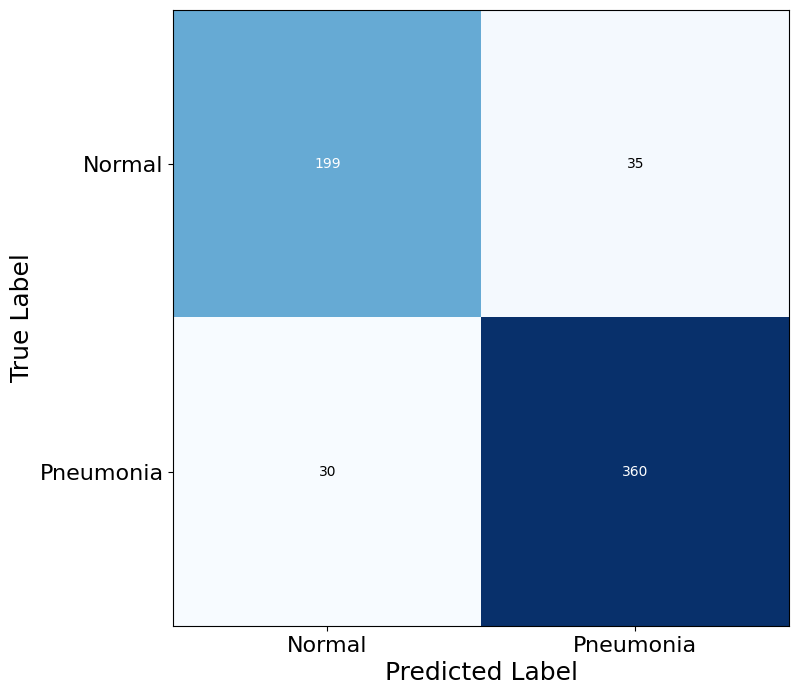

Accuracy of the model is 0.90
Recall of the model is 0.92
Precision of the model is 0.91
F1 Score of the model is 0.92


In [28]:
#Running on test data
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle = False)
model.to(device)
preds,labels = test_predict(model, testloader)




# Plot confusion matrix
cm  = confusion_matrix(labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.xlabel('Predicted Label',fontsize=18)
plt.ylabel('True Label',fontsize=18)
plt.show()



# Compute Performance Metrics
tn, fp, fn, tp = cm.ravel()

accuracy = (np.array(preds) == np.array(labels)).sum() / len(preds)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*((precision*recall)/(precision+recall))

print("Accuracy of the model is {:.2f}".format(accuracy))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1 Score of the model is {:.2f}".format(f1))

Additional Training

In [ ]:
# #Retrain rest of model
for param in model.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
#print(torch.cuda.memory_summary(device))
#torch.cuda.empty_cache()

model.to(device)
grad_clip = None
weight_decay = 1e-4
  #weighted loss for data class imbalance
epochs = 30
epochs = 2
model = train(model, criterion, optimizer, scheduler, epochs)

Rechecking Mislabeled Data

In [38]:
checking_path = moving_path
checkset = torchvision.datasets.ImageFolder(checking_path)
check_data_df = pd.DataFrame(checkset.imgs, columns=["img", "label"])

In [ ]:
for param in model.parameters():
    param.requires_grad = False
check_df = find_label_issues(model=model, data=checkset, data_transforms=data_transforms(TRAIN))